In [1]:
# Librarirs
from symbulate import *
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
P = BoxModel(['Politician', 'Ordinary_citizen', 'Medical_practitioner'], 
             size=2, replace = True) 
P.sim(10000).tabulate()

"(Medical_practitioner, Medical_practitioner)",1092
"(Medical_practitioner, Ordinary_citizen)",1113
"(Medical_practitioner, Politician)",1099
"(Ordinary_citizen, Medical_practitioner)",1107
"(Ordinary_citizen, Ordinary_citizen)",1116
"(Ordinary_citizen, Politician)",1087
"(Politician, Medical_practitioner)",1133
"(Politician, Ordinary_citizen)",1116
"(Politician, Politician)",1137
Total,10000


In [3]:
P.sim(10000).tabulate(normalize=True)

"(Medical_practitioner, Medical_practitioner)",0.1053
"(Medical_practitioner, Ordinary_citizen)",0.1169
"(Medical_practitioner, Politician)",0.1113
"(Ordinary_citizen, Medical_practitioner)",0.1135
"(Ordinary_citizen, Ordinary_citizen)",0.1142
"(Ordinary_citizen, Politician)",0.1116
"(Politician, Medical_practitioner)",0.1111
"(Politician, Ordinary_citizen)",0.1088
"(Politician, Politician)",0.1073
Total,1.0


In [4]:
P = BoxModel([0, 1, 2], size=2, replace = True) 
# 0 = Politician, 1 = Medical_practitioners, 2 = Ordinary_citizen
P.sim(10000).tabulate()

"(0, 0)",1121
"(0, 1)",1106
"(0, 2)",1105
"(1, 0)",1076
"(1, 1)",1124
"(1, 2)",1126
"(2, 0)",1138
"(2, 1)",1118
"(2, 2)",1086
Total,10000


In [5]:
X = RV(P, min)  # Politician
Y = RV(P, max)  # Ordinary citizen

In [6]:
outcome = (0, 1)
X(outcome), Y(outcome)

(0, 1)

In [7]:
x = X.sim(10000)
x.mean(), x.var()  # mean and variance of X random variable

(0.5571, 0.46073959000000003)

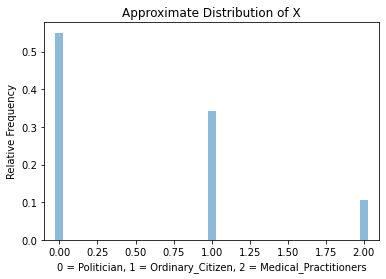

In [9]:
x.tabulate(normalize=True)
plt.title("Approximate Distribution of X")
plt.xlabel("0 = Politician, 1 = Ordinary_Citizen, 2 = Medical_Practitioners")
x.plot(linewidth = 8)

In [8]:
y = Y.sim(10000)
y.mean(), y.var()  # mean and variance of Y random variable

(1.4518, 0.4618767600000001)

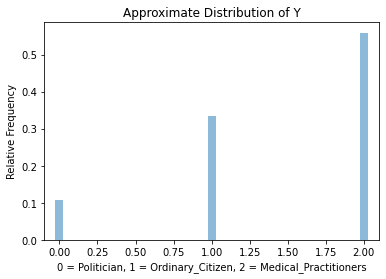

In [10]:
y.tabulate(normalize=True)
plt.title("Approximate Distribution of Y")
plt.xlabel("0 = Politician, 1 = Ordinary_Citizen, 2 = Medical_Practitioners")
y.plot(linewidth = 8)

In [11]:
joint = (X & Y).sim(10000).tabulate(normalize=True)
joint

"(0, 0)",0.1109
"(0, 1)",0.2275
"(0, 2)",0.2255
"(1, 1)",0.1026
"(1, 2)",0.2243
"(2, 2)",0.1092
Total,1.0


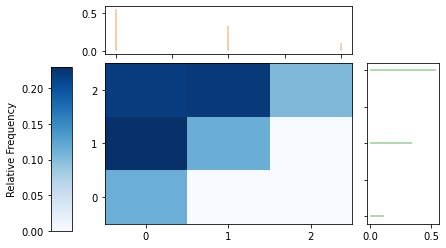

In [12]:
(X & Y).sim(10000).plot(
type=["tile", "marginal"])

In [13]:
## Tabulate the joint and marginal probabilities
data = [('0', '0.1101', '0.223', '0.2253', '0.5584'),
       ('1', '0', '0.1068', '0.2203', '0.3271'),
       ('2', '0', '0', '0.1145', '0.1145'),
       ('g(x)', '0.1101', '0.3298', '0.5601', '1.00')]
heads = ['X/Y', '0', '1', '2', 'h(y)']

In [14]:
print(tabulate(data, headers = heads, tablefmt = 'github'))

| X/Y   |      0 |      1 |      2 |   h(y) |
|-------|--------|--------|--------|--------|
| 0     | 0.1101 | 0.223  | 0.2253 | 0.5584 |
| 1     | 0      | 0.1068 | 0.2203 | 0.3271 |
| 2     | 0      | 0      | 0.1145 | 0.1145 |
| g(x)  | 0.1101 | 0.3298 | 0.5601 | 1      |


In [15]:
# Marginal of X
dataX =[('g(x)', '0.1101', '0.3298', '0.5601')] 
heads = ['X', '0', '1', '2']
print(tabulate(dataX, headers = heads, tablefmt = 'github'))

| X    |      0 |      1 |      2 |
|------|--------|--------|--------|
| g(x) | 0.1101 | 0.3298 | 0.5601 |


In [16]:
# Marginal of Y
dataY =[('h(y)', '0.5584', '0.3271', '0.1145')]
heads = ['Y', '0', '1', '2']
print(tabulate(dataY, headers = heads, tablefmt = 'github'))

| Y    |      0 |      1 |      2 |
|------|--------|--------|--------|
| h(y) | 0.5584 | 0.3271 | 0.1145 |


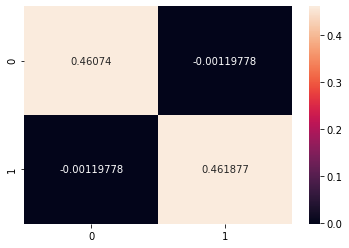

In [20]:
# Covariance and Correlation plot
df = data = np.array([x,y])
covMatrix = np.cov(df,bias=True)
sn.heatmap(covMatrix, annot=True, fmt='g')
plt.show()